<a href="https://colab.research.google.com/github/shwejanraj/AAvaTreap/blob/master/finalMathProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means clustering

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc
import time


In [ ]:
df = pd.read_csv('Iris.csv')
df.shape

(150, 6)

In [ ]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


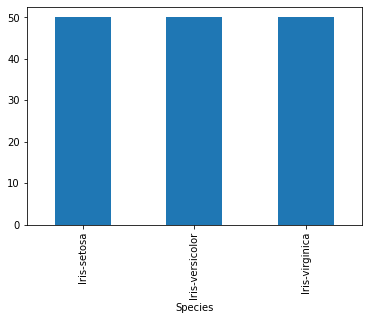

In [ ]:
df.groupby('Species').size().plot.bar()
plt.show()

In [ ]:
X = df.copy()
X = X.drop('Species', axis=1)
X.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
mms = MinMaxScaler()
mms.fit(X)
Xnorm = mms.transform(X)
Xnorm.shape

(150, 5)

K-Means Clustering

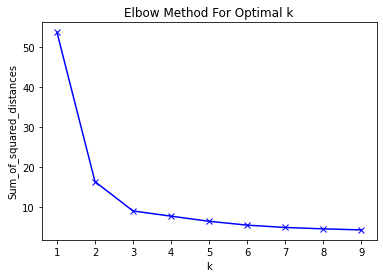

0 Iris-setosa
1 Iris-virginica
2 Iris-versicolor
Execution time  0.06979608535766602


In [ ]:
# Not knowing the number of clusters (3) we try a range such 1,10
# For the ELBOW method check with and without init='k-means++'

Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(Xnorm)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# Knowing from the ELBOW method that k=3 ...
start_time=time.time()
kmeans3 = KMeans(n_clusters = 3,random_state = 0)
y_kmeans = kmeans3.fit_predict(Xnorm)
X_data = df.copy()
X_data["Class"] = y_kmeans

KM_clustered = Xnorm.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans3.labels_ # append labels to points

frames = [df['Species'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])
print("Execution time ",time.time()-start_time)    

In [ ]:
print('K-Means performance')
print('-'*60)

Correct = (df['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)

K-Means performance
------------------------------------------------------------
Accuracy  0.98


Text(0, 0.5, 'PetalLengthCm')

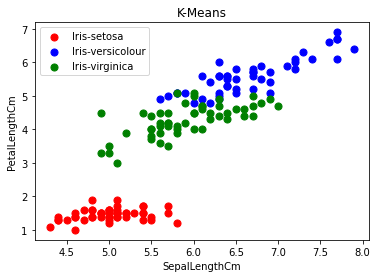

In [ ]:
plt.scatter(X_data.SepalLengthCm[y_kmeans == 0], X_data.PetalLengthCm[y_kmeans == 0], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X_data.SepalLengthCm[y_kmeans == 1], X_data.PetalLengthCm[y_kmeans == 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_data.SepalLengthCm[y_kmeans == 2], X_data.PetalLengthCm[y_kmeans == 2], s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.title("K-Means") 
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")

Hierarcical clustering

In [ ]:
start_time=time.time()
sc = AgglomerativeClustering(n_clusters = 3)
hc_predict = sc.fit_predict(Xnorm)
hc_predict
labels = sc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

Clustered = Xnorm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = sc.labels_ # append labels to points
#Clustered.sample(5)

frames = [df['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])
print("Execution time ",time.time()-start_time)    

number of estimated clusters : 3
0 Iris-virginica
1 Iris-setosa
2 Iris-versicolor
Execution time  0.0177614688873291


In [ ]:
print('Agglomerative clustering performance')
print('-'*60)

Correct = (df['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)

Agglomerative clustering performance
------------------------------------------------------------
Accuracy  1.0


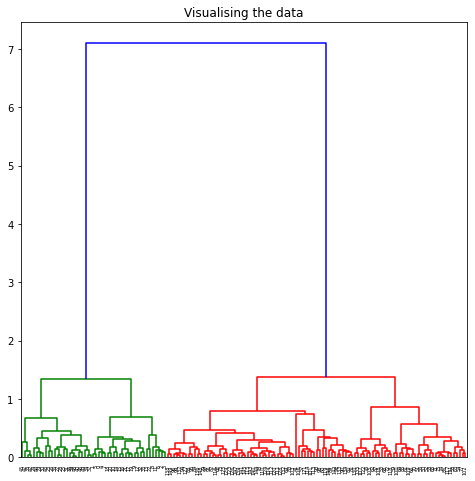

In [ ]:
#Normalise the scaled data
X_normalized = normalize(Xnorm) 
X_normalized_df = pd.DataFrame(X_normalized,columns = X.columns)

plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='ward')))

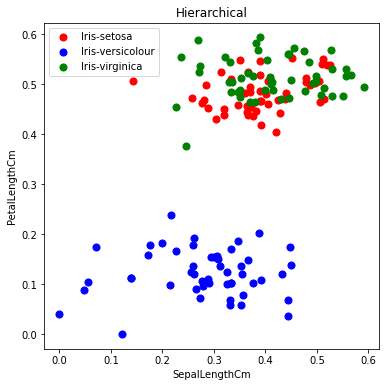

In [ ]:
# Visualizing the clustering  
X_hier = X_normalized_df.copy()
X_hier["Class"] = hc_predict

plt.figure(figsize =(6, 6))
plt.scatter(X_hier.SepalLengthCm[X_hier.Class == 0], X_hier.PetalLengthCm[X_hier.Class == 0], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X_hier.SepalLengthCm[X_hier.Class == 1], X_hier.PetalLengthCm[X_hier.Class == 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_hier.SepalLengthCm[X_hier.Class == 2], X_hier.PetalLengthCm[X_hier.Class == 2], s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.title("Hierarchical") 
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.show() 

Spectral clustering

In [ ]:
start_time=time.time()
sc = SpectralClustering(n_clusters = 3)
sc.fit(Xnorm)
# labels = ms.labels_
labels = sc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

Clustered = Xnorm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = sc.labels_ # append labels to points
#Clustered.sample(5)

frames = [df['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('Species').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])
print("Execution time ",time.time()-start_time)    

number of estimated clusters : 3
0 Iris-versicolor
1 Iris-virginica
2 Iris-setosa
Execution time  0.15899181365966797


In [ ]:
# Check performance of classification to 3 clusters

print('Spectral clustering performance')
print('-'*60)

Correct = (df['Species'] == result['TransLabel']).sum()
Accuracy = round(Correct/df.shape[0],3)
print('Accuracy ', Accuracy)

Spectral clustering performance
------------------------------------------------------------
Accuracy  0.907


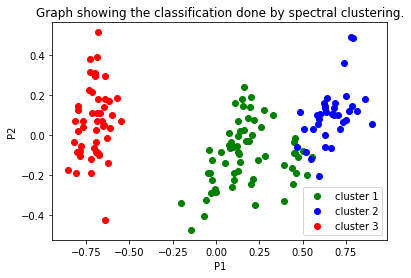

In [ ]:
# visualization
X_normalized = normalize(Xnorm)
X_normalized = pd.DataFrame(Xnorm)
pca = PCA(n_components = 2) 
X = pca.fit_transform(X_normalized)

fig, ax = plt.subplots()
plt.scatter(X[sc.labels_ == 0, 0], X[sc.labels_ == 0, 1], c='green', label='cluster 1')
plt.scatter(X[sc.labels_ == 1, 0], X[sc.labels_ == 1, 1], c='blue', label='cluster 2')
plt.scatter(X[sc.labels_ == 2, 0], X[sc.labels_ == 2, 1], c='red', label='cluster 3')
ax.set(xlabel='P1', ylabel='P2', title='Graph showing the classification done by spectral clustering.')
plt.legend()

Fuzzy_C_means

Execution time  9.660130977630615
Accuracy = 0.99


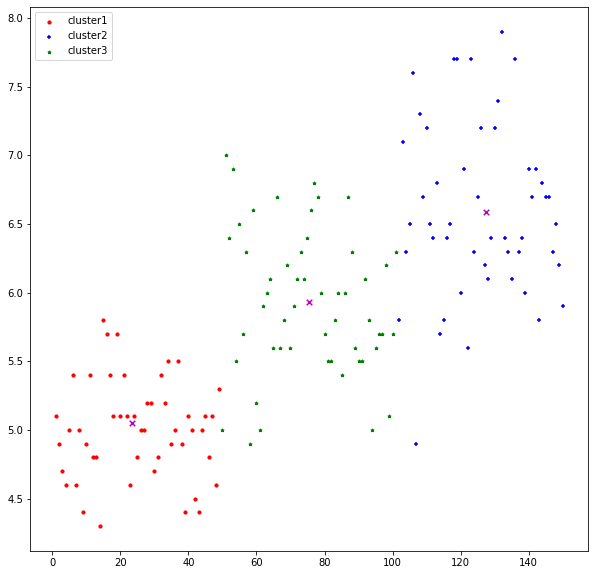

In [ ]:
from pylab import *
from numpy import *
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import random
import time

#Data is saved in a .csv file
df_full = pd.read_csv("Iris.csv")
# class_labels = list(df_full[columns[-1]])
columns = list(df_full.columns)
features = columns[:len(columns) - 1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]
# 
num_attr = len(df.columns) - 1
# 
k = 3
# Maximum number of iterations
MAX_ITER = 100
# Number of samples
n = len(df)  # the number of row
# fuzzy parameter
m = 2.00


# Initialize the fuzzy matrix U
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list]  #First normalization
        membership_mat.append(temp_list)
    return membership_mat


# 
def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    cluster_mem_val_list = list(cluster_mem_val)
    for j in range(k):
        x = cluster_mem_val_list[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z / denominator for z in numerator]  # Each dimension must be calculated.
        cluster_centers.append(center)
    return cluster_centers


#Update membership
def updateMembershipValue(membership_mat, cluster_centers):
    #    p = float(2/(m-1))
    data = []
    for i in range(n):
        x = list(df.iloc[i])  # Take out each line of data in the file
        data.append(x)
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j] / distances[c]), 2) for c in range(k)])
            membership_mat[i][j] = float(1 / den)
    return membership_mat, data


# Get cluster results
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    # 
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:  # The maximum number of iterations
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat, data = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    # print(membership_mat)
    return cluster_labels, cluster_centers, data, membership_mat

#Calculating the accuracy
# P.S. The accuracy calculation is for iris data only
def accuracy(cluster_labels, class_labels):
    correct_pred = 0
    #print(cluster_labels)
    seto = max(set(labels[0:50]), key=labels[0:50].count)
    vers = max(set(labels[50:100]), key=labels[50:100].count)
    virg = max(set(labels[100:]), key=labels[100:].count)
    
    for i in range(len(df)):
        if cluster_labels[i] == seto and class_labels[i] == 'Iris-setosa':
            correct_pred = correct_pred + 1
        if cluster_labels[i] == vers and class_labels[i] == 'Iris-versicolor' and vers!=seto:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == virg and class_labels[i] == 'Iris-virginica' and virg!=seto and virg!=vers:
            correct_pred = correct_pred + 1
            
    accuracy = (correct_pred/len(df))
    return accuracy

start_time=time.time()
labels, centers, data, membership = fuzzyCMeansClustering()
print("Execution time ",time.time()-start_time) 
a = accuracy(labels, class_labels)
print("Accuracy = " + str(round(a, 2)))
center_array = array(centers)
label = array(labels);
datas = array(data);

fig = plt.gcf()
fig.set_size_inches(10, 10)
f1 = plt.figure(1)
plt.scatter(datas[nonzero(label == 0), 0], datas[nonzero(label == 0), 1], marker='o', color='r', label='cluster1', s=10)
plt.scatter(datas[nonzero(label == 1), 0], datas[nonzero(label == 1), 1], marker='+', color='b', label='cluster2', s=10)
plt.scatter(datas[nonzero(label == 2), 0], datas[nonzero(label == 2), 1], marker='*', color='g', label='cluster3', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=30)
plt.legend()
plt.show()

